# Лабораторная работа № 3 Визуализация данных
## Вариант 9


**Цель работы:** изучение программных средств для визуализации наборов данных.

Продолжительность работы: - 4 часа.

Мягкий дедлайн (5 баллов): 10.10.2023

Жесткий дедлайн (2.5 баллов): 24.10.2023

**Задачи**
1. изучение основных типов графиков библиотеки matplotlib;
2. изучение основных типов графиков библиотеки seaborn;
3. получение навыков анализа данных по визуальным представлениям данных.

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
data_path = "./dataset/BSD.csv"
data = pd.read_csv(data_path)
data.head(20)

NameError: name 'pd' is not defined

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [20]:
data.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

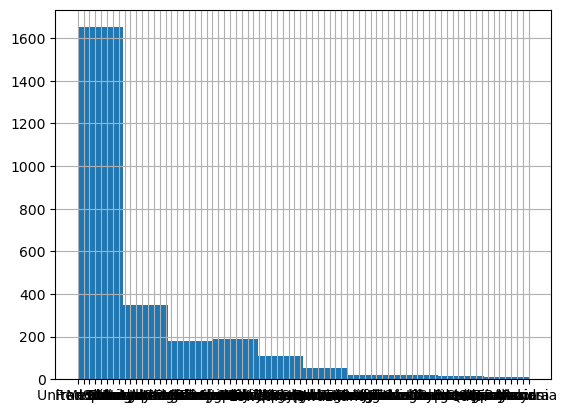

In [21]:
data['country'].hist();

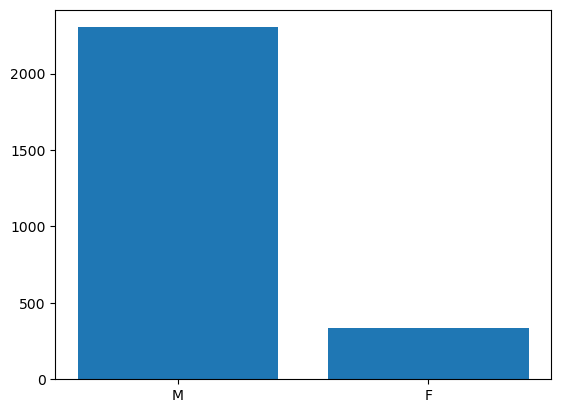

In [22]:
hist = data['gender'].value_counts()
plt.bar(hist.index, hist);

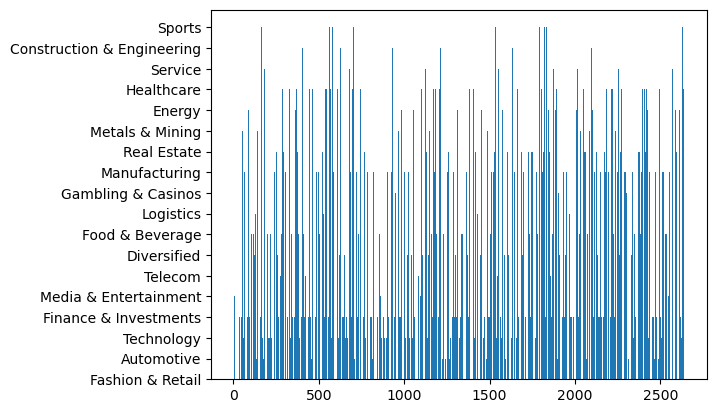

In [23]:
plt.bar(data.index, data['industries'])
plt.show()

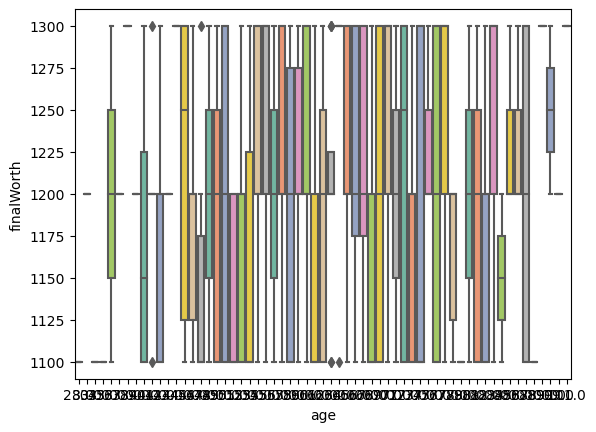

In [24]:
top_data = data[['finalWorth','age']]
top_data = top_data.groupby('finalWorth').sum()
top_data = top_data.sort_values('age', ascending=False)
top_data = top_data[:3].index.values
sns.boxplot(y='finalWorth', 
            x='age', 
            data=data[data.finalWorth.isin(top_data)], palette='Set2');

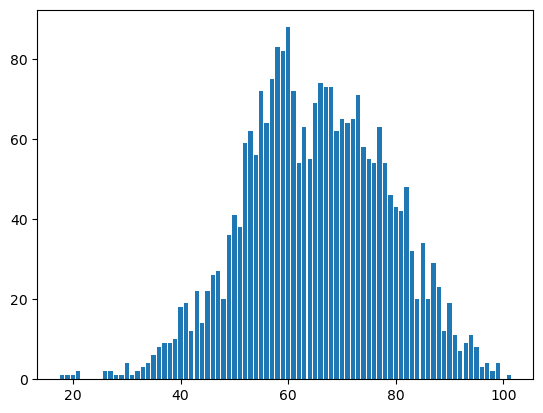

In [110]:
hist = data['age'].value_counts()
plt.bar(hist.index, hist);

In [13]:
data['gender'].value_counts()

gender
M    2303
F     337
Name: count, dtype: int64

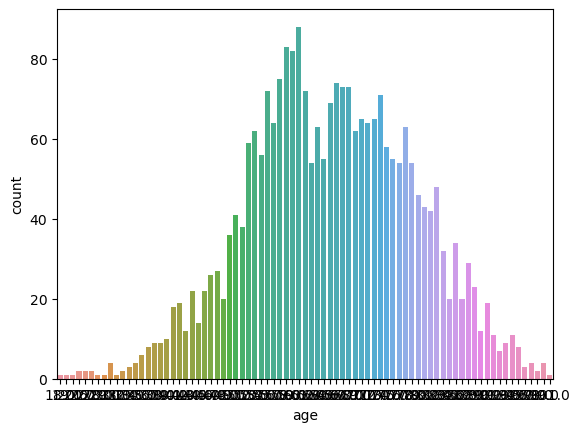

In [112]:
sns.countplot(x = 'age', data = data);

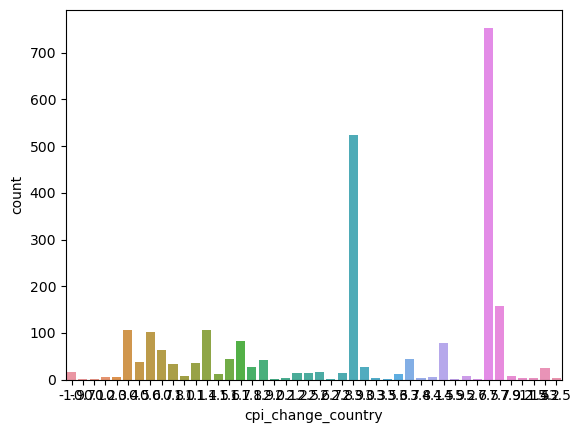

In [25]:
sns.countplot(x = 'cpi_change_country', data = data);

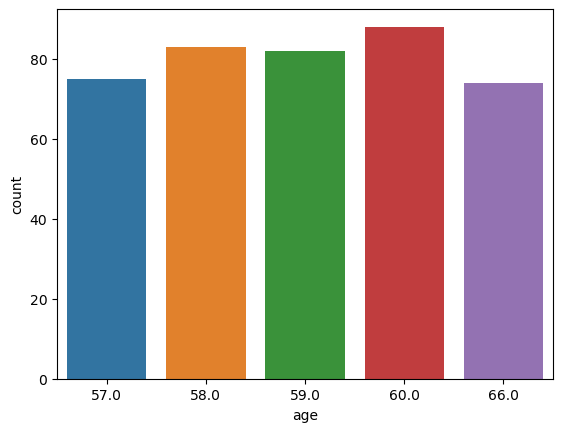

In [114]:
sns.countplot(x = data[data['age'].isin(data['age'].value_counts().head(5).index)]['age'], data = data);

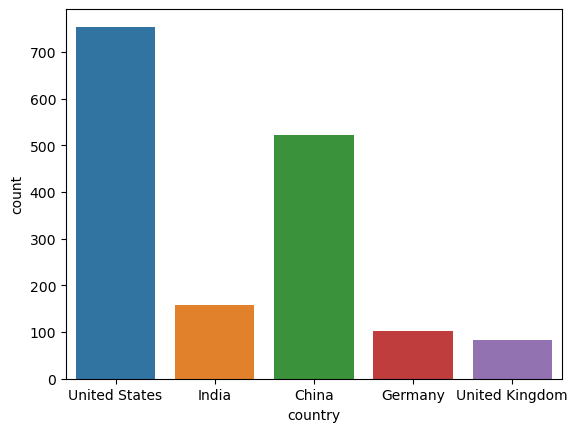

In [17]:
sns.countplot(x = data[data['country'].isin(data['country'].value_counts().head(5).index)]['country'], data = data);

C:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


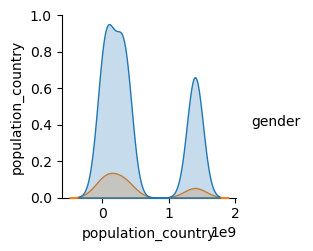

In [31]:
sns.pairplot(data[feats+['gender']], hue='gender');

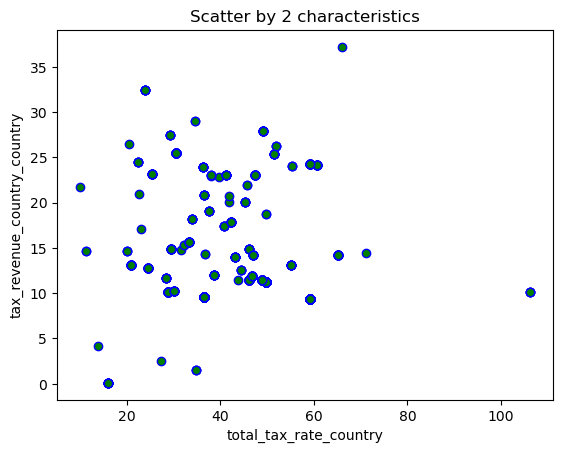

In [32]:
plt.scatter(
    data['total_tax_rate_country'], 
    data['tax_revenue_country_country'], 
    color='green', edgecolors='blue'
)

plt.xlabel('total_tax_rate_country')
plt.ylabel('tax_revenue_country_country')
plt.title('Scatter by 2 characteristics');

In [14]:
data.corr(numeric_only=True)

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
rank,1.000000,-0.448930,-0.142686,0.063669,0.143708,-0.042514,-0.042987,0.074872,-0.069537,-0.126277,0.005887,-0.041443,0.021576,0.123434,0.118411,-0.060056,0.185638
finalWorth,-0.448930,1.000000,0.067053,-0.023831,-0.066721,0.003407,0.059315,-0.042842,0.035702,0.066711,-0.008880,0.021819,-0.009270,-0.036381,-0.053024,0.031122,-0.101048
age,-0.142686,0.067053,1.000000,-0.050538,-0.999336,0.015322,0.081547,-0.001479,0.115669,0.061736,0.066394,0.020327,0.006429,-0.151771,-0.167812,-0.122544,-0.169338
selfMade,0.063669,-0.023831,-0.050538,1.000000,0.050333,0.001391,-0.030345,-0.015086,0.031552,0.012241,-0.224357,-0.052792,-0.156087,0.111429,0.221644,0.070572,0.106552
birthYear,0.143708,-0.066721,-0.999336,0.050333,1.000000,-0.045066,-0.091512,-0.000738,-0.118060,-0.061316,-0.066810,-0.017936,-0.005262,0.151297,0.167355,0.125035,0.169756
birthMonth,-0.042514,0.003407,0.015322,0.001391,-0.045066,1.000000,0.221384,0.056870,0.106427,0.049269,0.026174,-0.044165,0.001484,-0.046784,-0.050506,-0.038060,-0.062697
birthDay,-0.042987,0.059315,0.081547,-0.030345,-0.091512,0.221384,1.000000,0.037517,0.146357,0.171608,0.045075,0.004498,0.034128,-0.149580,-0.204271,0.006617,-0.188214
cpi_country,0.074872,-0.042842,-0.001479,-0.015086,-0.000738,0.056870,0.037517,1.000000,0.436769,-0.456428,0.279601,-0.747716,-0.037022,0.245961,0.218303,-0.215101,0.258661
cpi_change_country,-0.069537,0.035702,0.115669,0.031552,-0.118060,0.106427,0.146357,0.436769,1.000000,0.167455,0.053483,-0.393884,-0.317516,0.003272,0.066501,-0.113692,-0.470460
gross_tertiary_education_enrollment,-0.126277,0.066711,0.061736,0.012241,-0.061316,0.049269,0.171608,-0.456428,0.167455,1.000000,-0.298473,0.523931,0.028123,-0.393902,-0.543031,0.122088,-0.578740


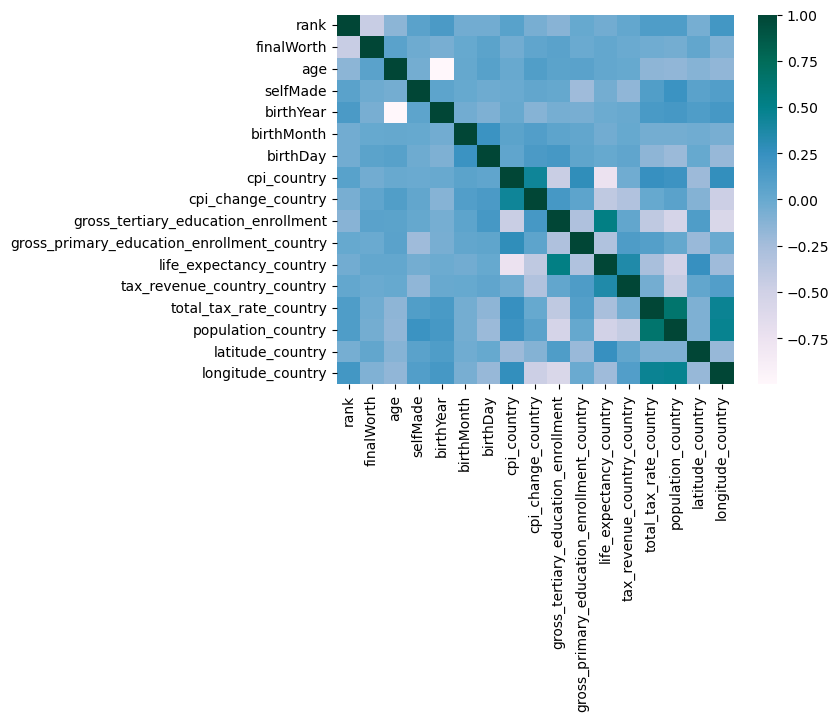

In [15]:
sns.heatmap(data.corr(numeric_only=True), cmap=plt.cm.PuBuGn);

In [16]:
feats=[f for f in data.columns if 'rank' in f]
feats

['rank']

In [17]:
data_uncorr = data.drop(feats, axis=1)
data_uncorr.columns

Index(['finalWorth', 'category', 'personName', 'age', 'country', 'city',
       'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

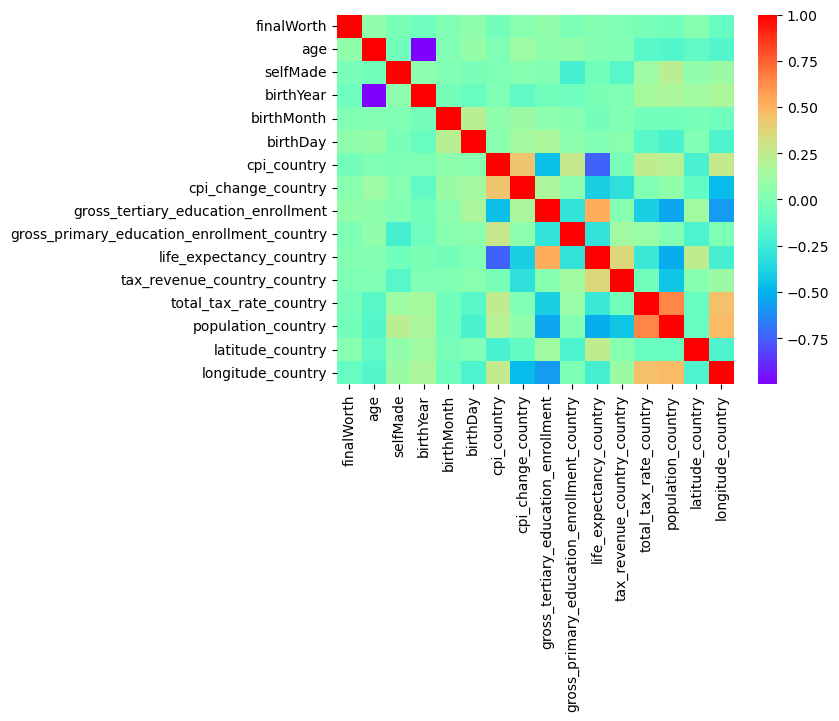

In [18]:
sns.heatmap(data_uncorr.corr(numeric_only=True), cmap=plt.cm.rainbow);

#### Контрольные вопросы
1. Перечислите функции Python, которые были изучены в рамках данной лабораторной работы и которые используются для визуализации данных.
**1.1. boxplot, countplot, scatter, heatmap, pairplot, bar**
2. Какая библиотека python предназначена для управления наборами данных: numpy, pandas, sklearn, opencv, matplotlib?
**2.1 pandas**
3. Какая стратегия является нежелательной при обработке пропусков в данных?

    а) замена пропущенных значений в столбце медианным значением по данному столбцу;

    б) удаление строк, содержащих пропуски в данных;

    в) замена пропущенных значений в столбце средним арифметическим значением по данному столбцу;

    г) замена пропущенных значений в столбце наиболее часто встречающимся значением по данному столбцу;
**3.1. Нежелательной стратегий при обработке пропусков в данных является удаление сттрокБ содержащих пропуски в данных. Ответ-Б**
4. Обоснуйте ответ на следующую проблему предварительной обработки данных: имеется независимая категориальная переменная, которая представляет собой категориальный признак, опеределнный на домене {C#, Java, Python, R}. Нужно ли применять к данному целевому признаку OneHotEncoder?
4.1 **Да, нужно**
5. Какой код лучше использовать при загрузке данных из csv-файла?

    а) dataset = read_csv('data.csv')

    б) dataset = import('data.csv')

    в) dataset = read.csv('data.csv')

    г) dataset = import.csv('data.csv')

    д) dataset = read_xls('data.csv')
**5.1 Ответ-а**